<a href="https://colab.research.google.com/github/kazezahra/kazezahra/blob/main/CNNMID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
len(gpus)

0

In [ ]:
#Remove dodgy images
import cv2
import imghdr
import matplotlib.pyplot as plt


In [ ]:
data_dir='/content/data'

In [ ]:
image_exts=['jpeg','jpg','bmp','png']

In [ ]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
os.listdir(data_dir)

['sad', 'happy']

In [ ]:
#Navigating through every single image in the happy folder
os.listdir(os.path.join(data_dir,'happy'))

['104278774.jpg',
 'vector7.svg',
 'images28.jpg',
 'compassion-900x387.jpg',
 'happy-woman-in-nature-at-sunset.jpg',
 'images27.jpg',
 'vector8.svg',
 'images23.jpg',
 'Super-Happy-People-yay.jpg',
 'images5.jpg',
 'images3.jpg',
 '8e06de1bf2171da2312b6de61c61e4bc.jpg',
 'happy-people21.jpg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_FMjpg_UX1000_.jpg',
 'diverse-happy-people-united-concept-101678776.jpg',
 '20150413185238-secrets-happy-entrepreneurs-woman-gratitude-rainbow-.jpeg',
 'images14.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'images29.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'image13.jpeg',
 'vector9.svg',
 'images4.jpg',
 'AF2bZyiuQWf7EXMl9YJeEmYPCypMqhKC5Q9nj1ulJIvoJws64-c-mo.jpg',
 'depositphotos_391577690-stock-photo-cheerful-woman-outstretched-hands-sitting.jpg',
 'image25.jpeg',
 'vector11.svg',
 'group-happy-people-party-isolated-white-background-31666248.jpg',
 'Happy20People.jpg',
 'images2.jpg',
 'image10.jpeg',
 'vector3.svg'

In [ ]:
#Removing the dodgy images
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
      image_path=os.path.join(data_dir,image_class, image)
      try:
        img=cv2.imread(image_path)
        tip=imghdr.what(image_path)
        if tip not in image_exts:
          print('Image not in ext list{}'.format(image_path))
          os.remove(image_path)
      except Exception as e:
        print('Issue with image{}'.format(image_path))

Image not in ext list/content/data/sad/vector7.svg
Image not in ext list/content/data/sad/vector8.svg
Image not in ext list/content/data/sad/vector9.svg
Image not in ext list/content/data/sad/vector11.svg
Image not in ext list/content/data/sad/depositphotos_19568511-stock-photo-teenage-girl-looking-thoughtful-about.jpg
Image not in ext list/content/data/sad/vector3.svg
Image not in ext list/content/data/sad/sad-young-woman-feeling-stressed-footage-107160392_iconl.jpeg
Image not in ext list/content/data/sad/depositphotos_217564870-stock-photo-young-attractive-sad-black-african.jpg
Image not in ext list/content/data/sad/sad-person-pictures-1920-x-1200-qq00l14kkjed5hew.jpg
Image not in ext list/content/data/sad/sad-young-man-bedroom-people-260nw-2274946189.jpg
Image not in ext list/content/data/sad/troubled-young-girl-comforted-by-260nw-74535430.jpg
Image not in ext list/content/data/sad/Sad-man-sitting-in-bedroom-thumbnail-732x549.jpg
Image not in ext list/content/data/sad/vector12.svg
I

In [ ]:
img=cv2.imread(os.path.join('/content/data','/content/data/happy','/content/data/happy/104278774.jpg'))

In [ ]:
img.shape

(1280, 720, 3)

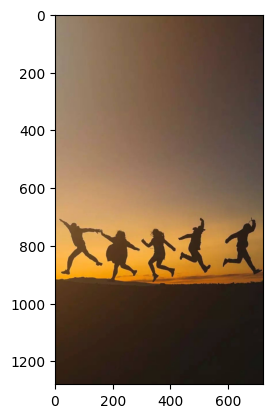

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

LOAD DATA

In [ ]:
tf.data.Dataset.list_files

tensorflow.python.data.ops.dataset_ops.DatasetV2

In [ ]:
import numpy as np


In [ ]:
#Really loading the data set
#Building the data pipeline
data=tf.keras.utils.image_dataset_from_directory('/content/data')

Found 276 files belonging to 2 classes.


In [ ]:
#Allowing us to access the pipeline
data_iterator=data.as_numpy_iterator()

In [ ]:
#Actually accessing the pipeline
batch=data_iterator.next()

In [ ]:
batch

(array([[[[3.31015625e+01, 3.51015625e+01, 3.41015625e+01],
          [3.76093750e+01, 3.96093750e+01, 3.86093750e+01],
          [3.85859375e+01, 4.05859375e+01, 3.95859375e+01],
          ...,
          [5.10859375e+01, 5.30859375e+01, 5.20859375e+01],
          [5.73750000e+01, 5.93750000e+01, 5.83750000e+01],
          [3.44921875e+01, 3.64921875e+01, 3.54921875e+01]],
 
         [[3.94765625e+01, 4.14765625e+01, 4.04765625e+01],
          [3.77421875e+01, 3.97421875e+01, 3.87421875e+01],
          [3.87578125e+01, 4.07578125e+01, 3.97578125e+01],
          ...,
          [3.25703125e+01, 3.45703125e+01, 3.35703125e+01],
          [3.31562500e+01, 3.51562500e+01, 3.41562500e+01],
          [3.88671875e+01, 4.08671875e+01, 3.98671875e+01]],
 
         [[4.28984375e+01, 4.48984375e+01, 4.38984375e+01],
          [4.42421875e+01, 4.62421875e+01, 4.52421875e+01],
          [4.36562500e+01, 4.56562500e+01, 4.46562500e+01],
          ...,
          [3.65468750e+01, 3.85468750e+01, 3.7546

In [ ]:
  batch[0].shape

(32, 256, 256, 3)

In [ ]:
batch[1]

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int32)

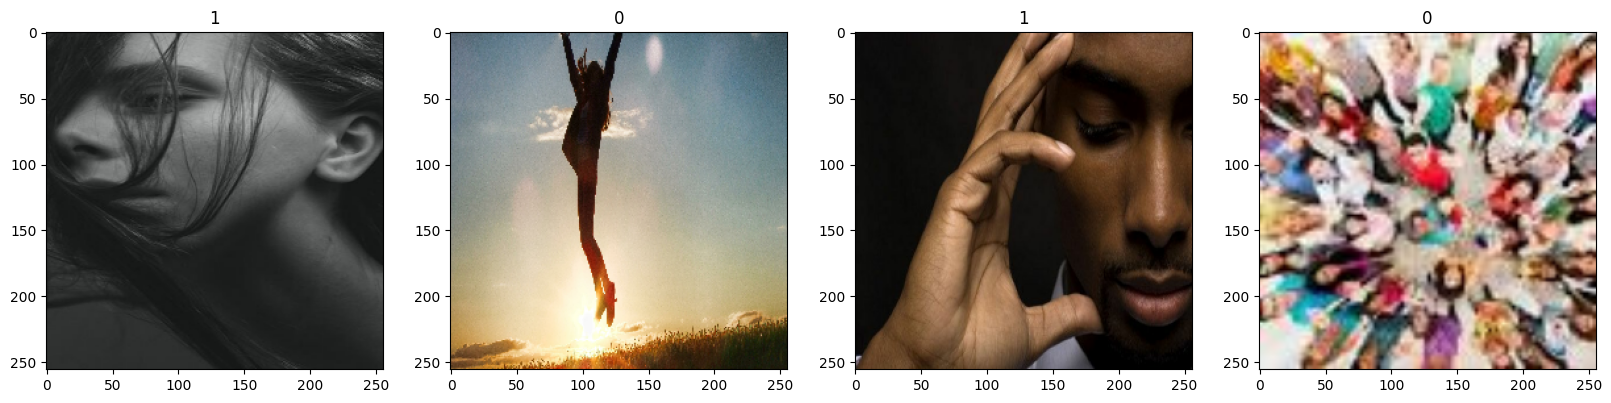

In [ ]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])



Gettinganother batch from the iterator

In [ ]:
batch=data_iterator.next()

In [ ]:
batch[1]

array([0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1], dtype=int32)

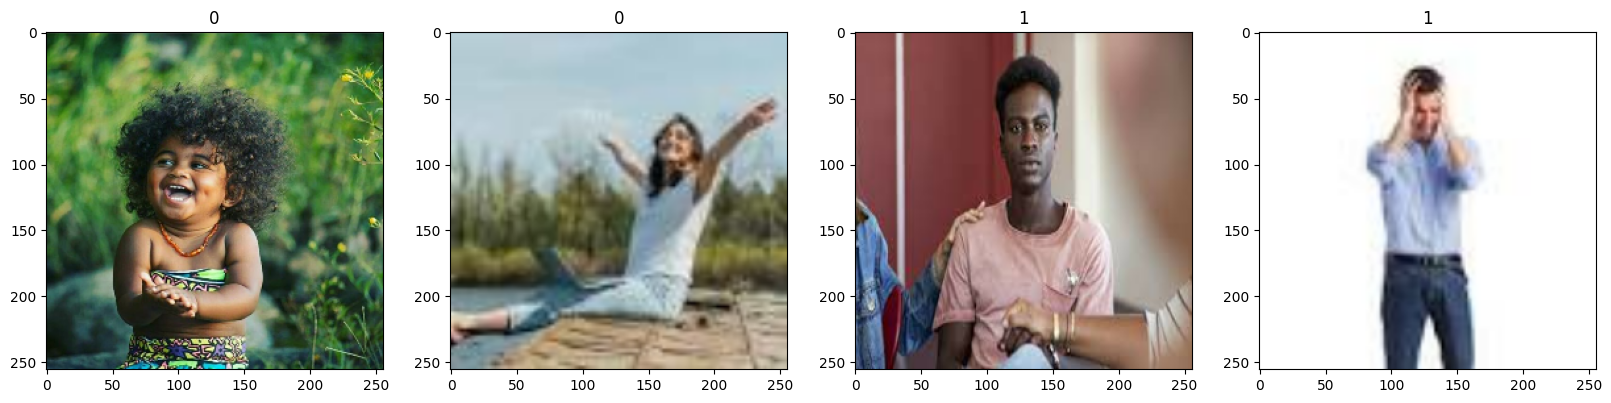

In [ ]:
fig, ax=plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])



Conclusion: sad images are marked as one where as happy images are labelled as 0

Part two: Preprocess the data(0-255):Preprocessing the data to 0 and 1

In [ ]:
scaled= batch[0]/255


In [ ]:
scaled.min()
scaled.max()

1.0

In [ ]:
#Scaling the data
#X is the images while y is the lables
data=data.map(lambda x,y:(x/255,y))

In [ ]:
data.as_numpy_iterator().next()[0]

array([[[[0.31764707, 0.24313726, 0.18431373],
         [0.30980393, 0.23529412, 0.1764706 ],
         [0.31363663, 0.23912683, 0.18030329],
         ...,
         [0.54950976, 0.51421565, 0.49460778],
         [0.570595  , 0.5393144 , 0.5176998 ],
         [0.5783701 , 0.5509191 , 0.5273897 ]],

        [[0.3137641 , 0.23925428, 0.18043076],
         [0.3136881 , 0.23917829, 0.18035476],
         [0.32152882, 0.24701904, 0.1881955 ],
         ...,
         [0.5902329 , 0.55493873, 0.5353309 ],
         [0.60549444, 0.57804346, 0.55451405],
         [0.60563725, 0.5821385 , 0.55860907]],

        [[0.31116423, 0.23665443, 0.17547183],
         [0.31624392, 0.2417341 , 0.1805515 ],
         [0.32259497, 0.24808517, 0.18690257],
         ...,
         [0.61743253, 0.58789843, 0.5755209 ],
         [0.63452816, 0.6109037 , 0.5965563 ],
         [0.6457292 , 0.6284804 , 0.6116146 ]],

        ...,

        [[0.6294271 , 0.5745251 , 0.539231  ],
         [0.6103616 , 0.5554596 , 0.5201655 ]

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

Splitting the data: Train and Test

In [ ]:
len(data)

9

In [ ]:
train_size=int(len(data)*.7)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

9

In [ ]:
val_size

2

In [ ]:
test_size

1

Train: The data we use to train the model
Validation: Evaluating the model while we are training it
Test: Used for testing our model


In [ ]:
#Using the take and skip method to determine the number of datasets taken
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [ ]:
len(train)

6

In [ ]:
len(val)

2

In [ ]:
len(test)

1

Part three: Build the deep learning model

In [ ]:
#1. Build the deep learning model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model=Sequential()

In [60]:
#This is where the magic happens
#16: NUMBER OF FLITERS, THE SIZE OF THE FILTER AND LASTLY THE STRIDE
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [61]:
MaxPooling2D??

In [62]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [64]:
#2,Train the model
logdir='logs'

In [65]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [66]:
hist=model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 20s 3s/step - loss: 1.3610 - accuracy: 0.4844 - val_loss: 0.6575 - val_accuracy: 0.5938
Epoch 2/20
6/6 [==============================] - 18s 3s/step - loss: 0.6514 - accuracy: 0.5990 - val_loss: 0.6353 - val_accuracy: 0.7188
Epoch 3/20
6/6 [==============================] - 17s 3s/step - loss: 0.6351 - accuracy: 0.6354 - val_loss: 0.6234 - val_accuracy: 0.7188
Epoch 4/20
6/6 [==============================] - 18s 3s/step - loss: 0.5868 - accuracy: 0.8125 - val_loss: 0.5245 - val_accuracy: 0.7656
Epoch 5/20
6/6 [==============================] - 17s 3s/step - loss: 0.4946 - accuracy: 0.7812 - val_loss: 0.5045 - val_accuracy: 0.7500
Epoch 6/20
6/6 [==============================] - 17s 3s/step - loss: 0.4650 - accuracy: 0.7760 - val_loss: 0.3684 - val_accuracy: 0.8906
Epoch 7/20
6/6 [==============================] - 18s 3s/step - loss: 0.3602 - accuracy: 0.8542 - val_loss: 0.3473 - val_accuracy: 0.8750
Epoch 8/20
6/6 [==================

In [68]:
hist.history

{'loss': [1.3609914779663086,
  0.6513806581497192,
  0.635115921497345,
  0.5867810249328613,
  0.4945642948150635,
  0.4650290012359619,
  0.360208123922348,
  0.3478432595729828,
  0.2512458562850952,
  0.2102634757757187,
  0.15142355859279633,
  0.09713400155305862,
  0.08918464928865433,
  0.09850006550550461,
  0.06076323986053467,
  0.08149021863937378,
  0.03766174986958504,
  0.02406555414199829,
  0.012366365641355515,
  0.06080074980854988],
 'accuracy': [0.484375,
  0.5989583134651184,
  0.6354166865348816,
  0.8125,
  0.78125,
  0.7760416865348816,
  0.8541666865348816,
  0.8541666865348816,
  0.9270833134651184,
  0.921875,
  0.9479166865348816,
  0.96875,
  0.96875,
  0.9635416865348816,
  0.9895833134651184,
  0.9739583134651184,
  0.9947916865348816,
  0.9947916865348816,
  1.0,
  0.984375],
 'val_loss': [0.6575188636779785,
  0.635277271270752,
  0.6233751177787781,
  0.5244809985160828,
  0.5044652223587036,
  0.36844080686569214,
  0.3472810983657837,
  0.289755582

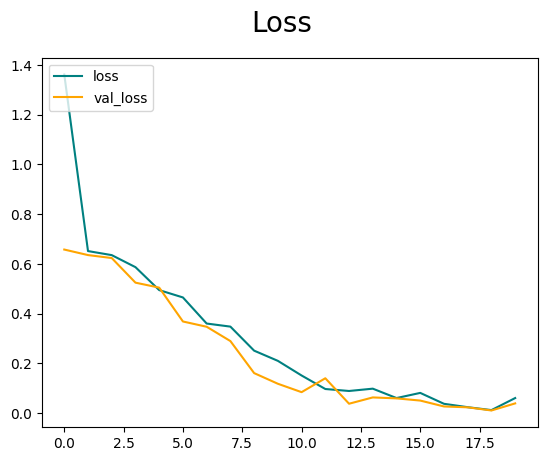

In [69]:
#Plotting our performance
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

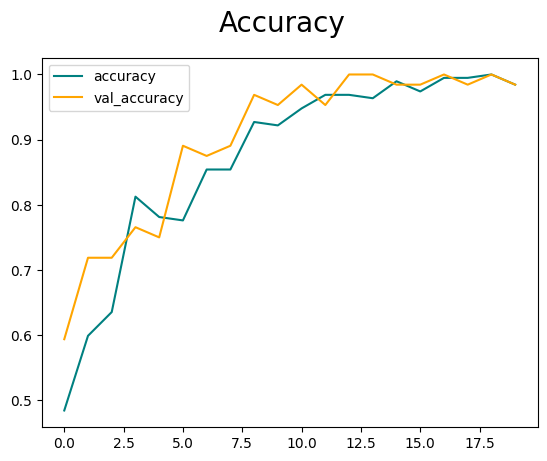

In [70]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

In [71]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [72]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [73]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 1s/step


In [74]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


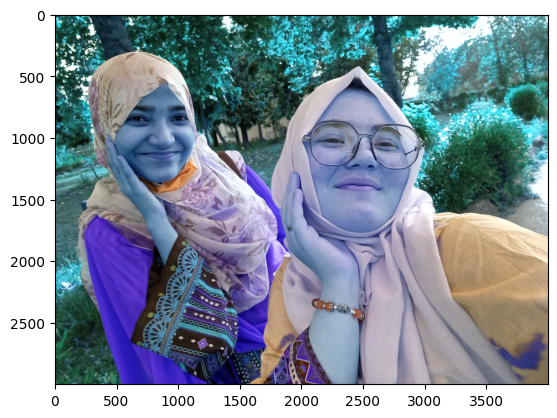

In [81]:
img1=cv2.imread('/content/data/happytest.jpg')
plt.imshow(img1)
plt.show()

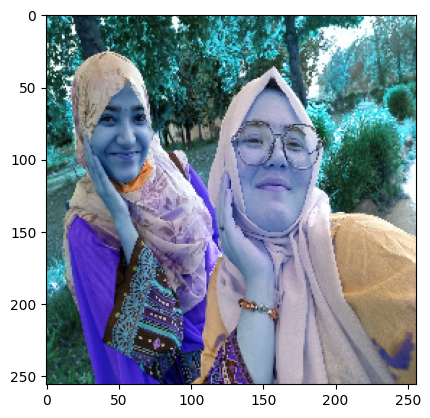

In [82]:
resize = tf.image.resize(img1, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [83]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 56ms/step


In [84]:
yhat

array([[3.0125066e-05]], dtype=float32)

In [85]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


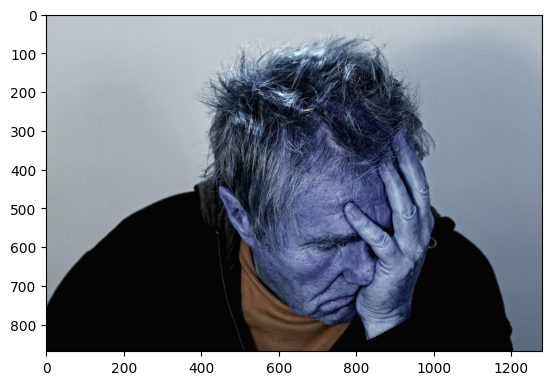

In [76]:
img=cv2.imread('/content/data/sadtest.jpg')
plt.imshow(img)
plt.show()

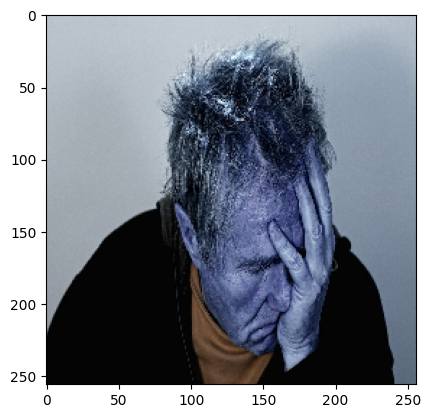

In [77]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [78]:
yhat=model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 38ms/step


In [79]:
yhat

array([[0.9981265]], dtype=float32)

In [80]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


In [86]:
#Saving the model
from tensorflow.keras.models import load_model

In [87]:
model.save(os.path.join('models','happysad.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [90]:
new_model = load_model(os.path.join('models','happysad.h5'))

In [91]:
new_model

In [92]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 164ms/step


array([[3.0125066e-05]], dtype=float32)